In [24]:
#Mustafa Nazlıer Data Mining Homework-4 TEXT MINING

#I will be using  the book "Call of the Cthulhu" from "H.P. Lovecraft" for this assignment.
#The data is full text already but there is some tokens to remove

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#!pip install nltk              #already downloaded the necessary package Natural Language toolkit




import re        #regular expressions
import codecs    #for to get our txt file
import collections 

from wordcloud import WordCloud   #importing wordcloud 
from wordcloud import ImageColorGenerator #for to color our wordcloud according to our image
from PIL import Image     #importing Image for getting our mask(as jpg file)

import nltk    #importing natural language toolkit for dealing with unstructured texts
              #I am using nltk apart from the video on the aybuzem because it is compatible with the flow of my code
              # and I want to have a more specialized WordCloud in the end
from nltk.stem import PorterStemmer # This package is for to find thr root of the words(for example: likes, likely, likeable will be count as like)
from nltk.tokenize import WordPunctTokenizer #This package is for to extract the tokens from string of words 
from nltk.corpus import stopwords #importing stopwords for to detect them(and, the, so etc.)

with codecs.open("The_Call_of_Cthulhu.txt" , "r" , encoding="utf-8") as f:cthulhu =f.read()  # reading our txt
    
nltk.download('stopwords')  #downloading the stopwords, stopwords are basically the words that are used often in our language but
#they do not have a spesific content/meaning. the words like because , and, there etc. If we run our wordcloud without
#removing them, the visualization would be full of stopwords and thus interrupting us from understanding the text more



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mustafa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
EnglishStopWords = stopwords.words('english')  
# we can add any word to this EnglishStopWords.append('') to remove any word
EnglishStopWords.append('could') #I realised that these two are nonexist in the default stopwords
EnglishStopWords.append('would') 

word_pattern = re.compile("^\w+$")    #We can remove any of the pattern that we want not to include in the output
                                      #like if you are using tweets as your input data, you may exclude @somethingsomething
EnglishStopWords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
def text_counter(text): 
    tokens= WordPunctTokenizer().tokenize(PorterStemmer().stem(text))  #stemming
    tokens= list(map(lambda x: x.lower(), tokens))     #lowercasing all
    tokens= [token for token in tokens if re.match(word_pattern, token) and token not in EnglishStopWords] #removing stopwords
    return collections.Counter(tokens)

#With this function , I first stemmed the text for finding the same roots, then made all the words lowercase
#then looked for the patterns that I want to get rid of, and finally checked for the stopwords
# This function will return a Counter object made of the words.
#A counter object is a data set which will include my words parsed and also how many times they are repeated


In [27]:
ct_counter = text_counter(cthulhu)  #using the counter with my data
ct_counter


Counter({'call': 3,
         'cthulhu': 24,
         'h': 2,
         'p': 3,
         'lovecraft': 1,
         'written': 3,
         'summer': 2,
         '1926': 3,
         'published': 2,
         'february': 5,
         '1928': 1,
         'weird': 4,
         'tales': 2,
         'vol': 1,
         '11': 1,
         '2': 4,
         '159': 1,
         '78': 1,
         '287': 1,
         'great': 32,
         'powers': 1,
         'beings': 2,
         'may': 10,
         'conceivably': 1,
         'survival': 2,
         'hugely': 1,
         'remote': 2,
         'period': 5,
         'consciousness': 2,
         'manifested': 2,
         'perhaps': 3,
         'shapes': 3,
         'forms': 2,
         'long': 12,
         'since': 6,
         'withdrawn': 1,
         'tide': 1,
         'advancing': 1,
         'humanity': 1,
         'poetry': 2,
         'legend': 2,
         'alone': 7,
         'caught': 2,
         'flying': 1,
         'memory': 5,
         'called': 5

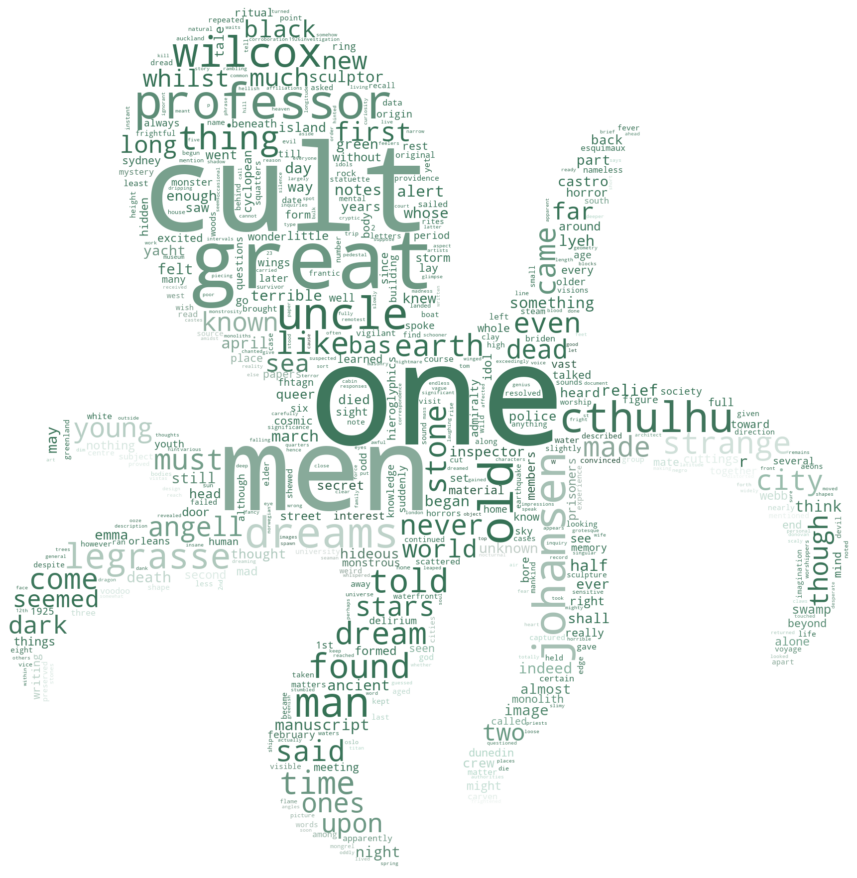

In [40]:
#I already removed the stopwords and tokens from my data bt using 
#Natural Language Tool Kit, so I will not be using the Stopwords package 
#from wordcloud
   
     
    

myMask = np.array(Image.open('octo.png'))   #My mask for a cooler visualization in the end

    #I already have the each words repetition count, but to be able to use with the wordcloud, I need a Counter Object
    #Counter objects are datasets
    
     
   
wordcloud = WordCloud(width = 1000, height = 1000,  max_words=100000, #we can give input of max words If we want an upper limit, default is 200 I checked it
                background_color ='white', 
                mask=myMask,
                min_font_size = 10).generate_from_frequencies(ct_counter) #sending my counter containing my words and repetitions
  
    #I can use generate(String) with the wordcloud but with generate_from_frequencies(Counter_obj) I am able to
    #visualize a more important thing, repetititons. Now, the size of the each word will be depending on its repetition count
    #more repetitions means bigger word in the output. This creates a better visual understanding 
    
image_colors = ImageColorGenerator(myMask)
wordcloud.recolor(color_func=image_colors)   #coloring my wordcloud according to its Png's color density values
    

 # plot the WordCloud image  
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud ,interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()   #the result is a wordcloud shaped of a green octopus


